In [1]:
from utils import get_project_root
from typing import Literal
import joblib
import numpy as np
import lightning as L
import matplotlib.pyplot as plt
from collections import defaultdict
from captum.attr import visualization
import seaborn as sns

In [2]:
dataset = "isic"
none = get_project_root() / f"runs/{dataset}/none/version_1/figures/test"
feedback = get_project_root() / f"runs/{dataset}/feedback/version_1/figures/test"
da = get_project_root() / f"runs/{dataset}/data_augmentation/version_1/figures/test"
save_folder = get_project_root() / f"data/{dataset}"

In [3]:
L.seed_everything(0, workers=True)
files = defaultdict(list)
for name, folder in [("none",none), ("feedback", feedback), ("da", da)]:
    for file in sorted(folder.iterdir(), key=lambda x: x.stem.split("__")[0][3:]):
        if "joblib" in str(file):
            with open(file, "rb") as f:
                files[name].append(joblib.load(f))


Seed set to 0


Seed set to 0


Display 249


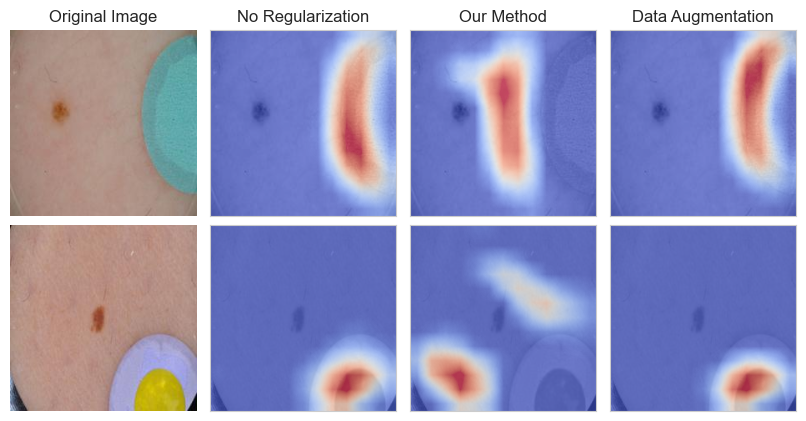

In [14]:
nrows, ncols = 2, 4
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, constrained_layout=True, figsize=(2 * ncols, 2.05 * nrows))
L.seed_everything(0, workers=True)
idx = np.arange(len(files["none"]))
np.random.shuffle(idx)

display_idx = 0
for row in range(nrows):
    while not files["none"][idx[display_idx]][2]:
        display_idx += 1
    axs[row, 0].imshow(files["none"][idx[display_idx]][0], cmap="gray" if "mnist" in dataset else None)
    axs[row, 0].axis('off')
    if row == 0:
        axs[row, 0].set_title("Original Image")
    visualization.visualize_image_attr(files["none"][idx[display_idx]][1], files["none"][idx[display_idx]][0],
                                       use_pyplot=False, plt_fig_axis=(fig, axs[row, 1]), method="blended_heat_map",
                                       cmap=sns.color_palette("coolwarm", as_cmap=True), title="No Regularization" if row == 0 else None,
                                       alpha_overlay=0.7)
    visualization.visualize_image_attr(files["feedback"][idx[display_idx]][1], files["feedback"][idx[display_idx]][0],
                                       use_pyplot=False, plt_fig_axis=(fig, axs[row, 2]), method="blended_heat_map",
                                       cmap=sns.color_palette("coolwarm", as_cmap=True), title="Our Method" if row == 0 else None,
                                       alpha_overlay=0.7)
    visualization.visualize_image_attr(files["da"][idx[display_idx]][1], files["da"][idx[display_idx]][0],
                                       use_pyplot=False, plt_fig_axis=(fig, axs[row, 3]), method="blended_heat_map",
                                       cmap=sns.color_palette("coolwarm", as_cmap=True), title="Data Augmentation" if row == 0 else None,
                                       alpha_overlay=0.7)
    display_idx += 1

fig.savefig(save_folder / f"{dataset}_model_focus.pdf", bbox_inches='tight', pad_inches=0.0)

while not files["none"][idx[display_idx]][2] or idx[display_idx] > 1_000:
    display_idx += 1

print("Display", idx[display_idx])